<img src="mobile_1500x450.jpg"/>

<div align="right"><font color=grey size=2>Image © TechnoWeb Solutions</font></div>

# Popular App Profiles for the App Store and Google Play Markets

My goal for this project is to analyze two Kaggle datasets to help developers that build Android and iOS mobile apps understand what type of apps are likely to attract more users.

<a href="https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps">The first dataset</a> containing data about approximately 7,000 iOS apps from the App Store, was collected in July 2017. <a href="https://www.kaggle.com/lava18/google-play-store-apps">The second dataset</a> containing data about approximately 10,000 Android apps from Google Play, was collected in August 2018.

Data cleaning and visulization are applied in the exploratory analysis.

In [121]:
import pandas as pd

ios = pd.read_csv('AppleStore.csv')
print('ios data frame shape: ', ios.shape)
print('Column names:', ios.columns.values)

ios.head()

ios data frame shape:  (7197, 16)
Column names: ['id' 'track_name' 'size_bytes' 'currency' 'price' 'rating_count_tot'
 'rating_count_ver' 'user_rating' 'user_rating_ver' 'ver' 'cont_rating'
 'prime_genre' 'sup_devices.num' 'ipadSc_urls.num' 'lang.num' 'vpp_lic']


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [122]:
android = pd.read_csv('googleplaystore.csv')
print('android data frame shape: ', android.shape)
print('Column names:', android.columns.values)

android.head()

android data frame shape:  (10841, 13)
Column names: ['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type' 'Price'
 'Content Rating' 'Genres' 'Last Updated' 'Current Ver' 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1. Data Cleaning

### 1.1 Target Apps

As we are interested in the apps in English that are free to download, we need to select free and English apps exclusively. 

First, let's check the distribution of paid and free apps, and their reviews in iOS Stores and Google Play.

Text(0.5, 1.0, 'Distribution of Price for iOS Apps')

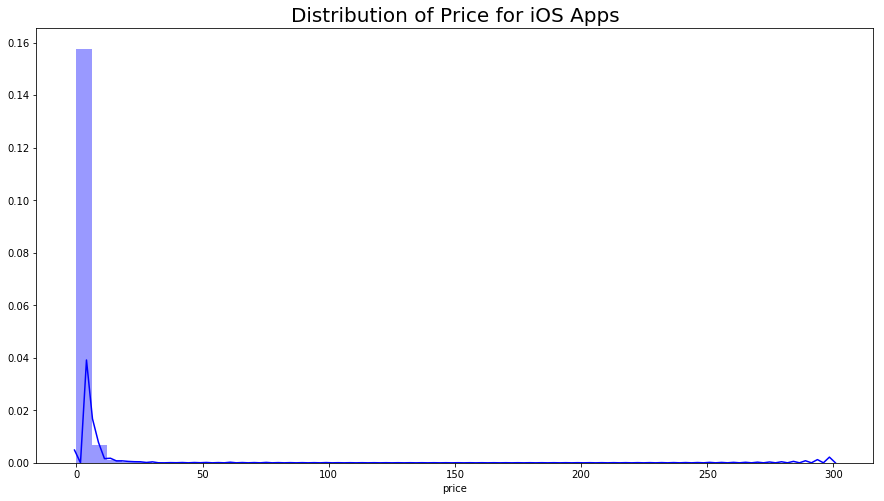

In [166]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.distplot(ios['price'], color = 'Blue')
plt.title('Distribution of Price for iOS Apps',size = 20)

In [124]:
ios[ios['price'] >= 50].sort_values('price', ascending = False)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5184,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1
2828,308368164,Proloquo2Go - Symbol-based AAC,723764224,USD,249.99,773,10,4.0,3.5,5.0.1,4+,Education,37,5,3,1
4769,849732663,KNFB Reader,106429440,USD,99.99,71,0,4.5,0.0,2.7.3,4+,Productivity,37,5,14,1
2659,320279293,NAVIGON Europe,144412672,USD,74.99,927,3,3.5,2.5,2.17,4+,Navigation,37,2,21,1
3619,491998279,Articulation Station Pro,425919488,USD,59.99,294,130,4.5,5.0,2.2.3,4+,Education,38,5,1,1
4495,946930094,FineScanner Pro - PDF Document Scanner App + OCR,63974400,USD,59.99,100,4,4.0,4.5,6.2.5,4+,Business,37,5,12,1
5365,700440156,Articulation Test Center Pro,174737408,USD,59.99,29,0,4.5,0.0,2.6,4+,Education,24,5,1,1


Text(0.5, 1.0, 'Distribution of Reviews for iOS Apps')

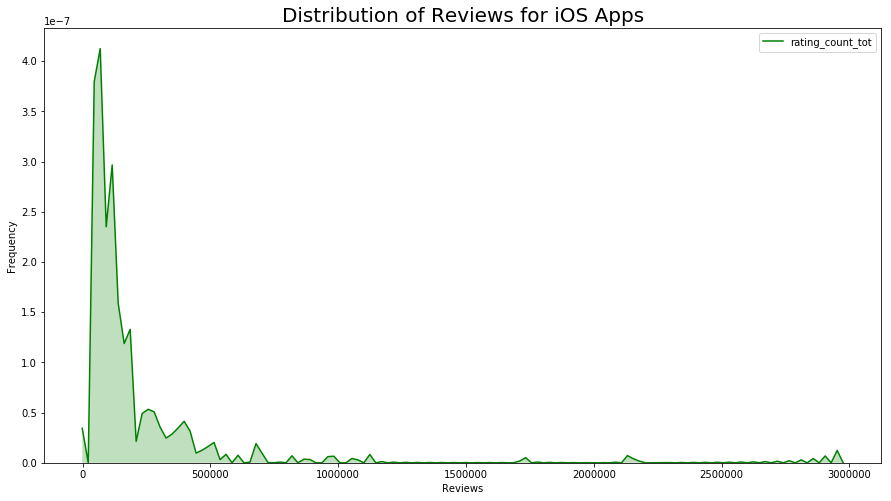

In [165]:
plt.figure(figsize=(15,8))
sns.kdeplot(ios['rating_count_tot'], color = "Green", shade = True)

plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews for iOS Apps',size = 20)

In [125]:
# for example, non-English apps
print(ios.tail(10)['track_name'])

7187                     友達 恋人探し であい ちゃっと sns -ギャルとも
7188                              【難問謎解き】ねこ神様はクイズ好き？
7189            【悲報】鬼ヶ島終了のお知らせ　-ゾンビ桃太郎が3Dすぎて鬼やばいwww-
7190                         中学英文法総復習 パターンで覚える 瞬間英文法
7191                           Brain15 − 脳トレ 無料パズル −
7192    Shark Boom - Challenge Friends with your Pet
7193                             【謎解き】ヤミすぎ彼女からのメッセージ
7194                                      Go!Go!Cat!
7195     Suppin Detective: Expose their true visage!
7196             みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~
Name: track_name, dtype: object


In [126]:
def is_english(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True

ios_target = ios[(ios['track_name'].apply(lambda x: is_english(x))) & (ios['price'] == 0.0)]
print('{} ios apps in total Vs {} free ios apps in English after the filter'.format(len(ios), len(ios_target)))

7197 ios apps in total Vs 2922 free ios apps in English after the filter


In [127]:
# Note that two features Reviews and Price are string
print(android.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [128]:
print(android['Price'].unique())

android[android['Price'] == 'Everyone']

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [129]:
android['Price'].replace('Everyone', '0', inplace = True)
android['Price'] = android['Price'].apply(lambda x: float(x.split('$')[1]) if x.startswith('$') else float(x))

android['Reviews'].replace('3.0M', None, inplace = True)
android['Reviews'] = android['Reviews'].astype(int) 

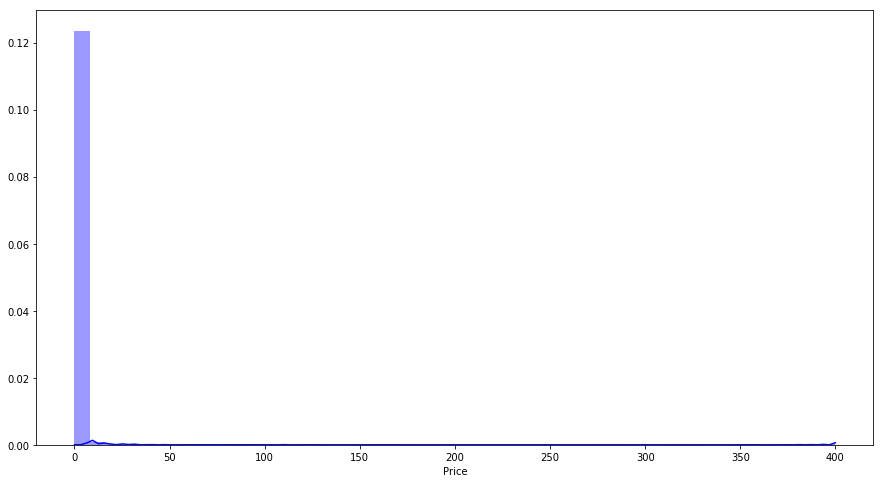

In [162]:
plt.figure(figsize=(15,8))
sns.distplot(android['Price'], color = 'Blue')

In [131]:
android[android['Price'] >= 50].sort_values('Price', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,"1,000+",Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,"5,000+",Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0+,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


Text(0.5, 1.0, 'Distribution of Reviews for Android Apps')

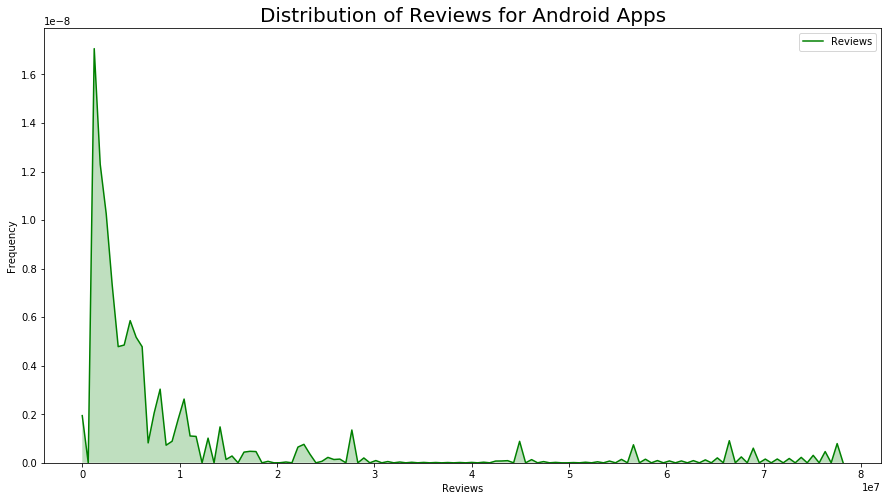

In [167]:
plt.figure(figsize=(15,8))
sns.kdeplot(android['Reviews'], color = "Green", shade = True)

plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews for Android Apps',size = 20)

In [132]:
android_target = android[(android['App'].apply(lambda x: is_english(x))) & (android['Price'] == 0)]

print('{} Android apps in total Vs {} free andriod apps in English after the filter'.format(len(android), len(android_target)))

10841 Android apps in total Vs 9490 free andriod apps in English after the filter


### 1.2 Duplicates and Missing Values

Next step, delete duplicates and check missing values in both datasets.

In [133]:
print(ios_target[ios_target.duplicated()])
print(ios_target.isna().sum())

Empty DataFrame
Columns: [id, track_name, size_bytes, currency, price, rating_count_tot, rating_count_ver, user_rating, user_rating_ver, ver, cont_rating, prime_genre, sup_devices.num, ipadSc_urls.num, lang.num, vpp_lic]
Index: []
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64


There are no duplicates or missing values in *ios_target* data set.

In [134]:
print(len(android_target['App'].unique()), 'unique Andriod apps in android_target')

duplicate_rows = android_target[android_target.duplicated('App')]
print('number of duplicate rows: ', duplicate_rows.shape[0])
print(len(duplicate_rows['App'].unique()), 'unique apps in the duplicates')

8409 unique Andriod apps in android_target
number of duplicate rows:  1081
714 unique apps in the duplicates


In [135]:
android_target.isna().sum()

App                  0
Category             0
Rating            1241
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          6
Android Ver          2
dtype: int64

Meanwhile, let's take a close look at the duplicate data in *androidFree*, *Slack* and *Google Ads* as examples. 

In [136]:
android_target[android_target['App'] == 'Slack']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
240,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
294,Slack,BUSINESS,4.4,51510,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [137]:
android_target[android_target['App'] == 'Google Ads']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
238,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
4979,Google Ads,BUSINESS,4.3,29331,20M,"5,000,000+",Free,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up


From the above examples, the major difference in the duplicate apps is the *Reviews* attribute. 

As the higher the number of *Reviews*, the more recent the data should be, I prefer to keep the row with the highest number of *Reviews* and remove the other entries for the same app. But we need to consider three possible combinations of *Rating* and *Reviews* in the duplicate apps:

1. Different *Reviews*, same *Rating* (NaN or float): we keep the one with more *Reviews*.
2. Same *Reviews*, different *Rating* (one is NaN and the other(s) float): we keep the one whose rating is not null.
3. Different *Reviews*, different *Rating* (one is NaN and the other(s) float): we keep the one with more *Reviews*. In this case, if *Rating* is null in the selected one, we will impute the missing value with *Rating* in the duplicates.

After checking the following duplicates, I find the second and third combinations do not exist in the dataset which saves me the trouble.

In [138]:
Nan_list = list(duplicate_rows[duplicate_rows['Rating'].isna()]['App'].unique())

android_target[android_target['App'].str.match('|'.join(Nan_list))].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0.0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0.0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
2310,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0.0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
6621,Blood Pressure - Heartcare,MEDICAL,4.2,70,1.9M,"10,000+",Free,0.0,Everyone,Medical,"May 27, 2016",2.46 Saber,4.4 and up
2530,Blood Pressure - Stay Healthy,MEDICAL,4.6,7,2.7M,"1,000+",Free,0.0,Everyone,Medical,"April 16, 2018",43.0,4.0.3 and up
6609,Blood Pressure Diary,FAMILY,4.6,47,3.3M,"5,000+",Free,0.0,Everyone,Simulation,"August 1, 2018",1.1,4.0.3 and up
6592,Blood Pressure Info,FAMILY,3.9,174423,7.9M,"10,000,000+",Free,0.0,Everyone,Entertainment,"August 2, 2018",2.28,4.0 and up
6587,Blood Pressure Log - MyDiary,MEDICAL,4.7,8347,2.6M,"500,000+",Free,0.0,Everyone,Medical,"April 13, 2018",1.4.6,4.0 and up
2323,Blood Pressure Log - MyDiary,MEDICAL,4.7,8348,2.6M,"500,000+",Free,0.0,Everyone,Medical,"April 13, 2018",1.4.6,4.0 and up
6608,Blood Pressure Log - bpresso.com,MEDICAL,4.2,5661,Varies with device,"500,000+",Free,0.0,Everyone,Medical,"April 19, 2017",Varies with device,Varies with device


In [139]:
android_final = android_target.sort_values('Reviews', ascending = False).drop_duplicates('App')
print(len(android_final))

# double check
print(len(android_target) - duplicate_rows.shape[0])

android_final[android_target['App'] == 'Slack']

8409
8409


C:\Data\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
294,Slack,BUSINESS,4.4,51510,Varies with device,"5,000,000+",Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


Finally we have 1231 missing values in *Rating* in *android_final* data set after the duplicats are deleted accordingly, which account for 14.64%, much more than 5% of the data. Therefore, we are not able to impute the missing values with the mean of data. 

In [140]:
print(android_final.isna().sum())

rating_na = android_final['Rating'].isna().sum()
print('{0:.2%}'.format(rating_na/len(android_final)))

App                  0
Category             0
Rating            1231
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          6
Android Ver          2
dtype: int64
14.64%


As a result,there are 2922 ios apps and 7177 Android apps that meet our requirements after the data cleaning.

In [141]:
ios_target[['user_rating', 'rating_count_tot', 'price']].describe()

,user_rating,rating_count_tot,price
count,2922.000000,2.922000e+03,2922.0
mean,3.882444,2.423410e+04,0.0
std,1.070019,1.120867e+05,0.0
min,0.000000,0.000000e+00,0.0
25%,3.500000,1.350000e+02,0.0
50%,4.000000,1.107500e+03,0.0
75%,4.500000,9.028250e+03,0.0
max,5.000000,2.974676e+06,0.0


In [142]:
android_final = android_final[android_final['Rating'].notna()]
android_final.describe()

,Rating,Reviews,Price
count,7178.000000,7.178000e+03,7178.0
mean,4.165325,2.685116e+05,0.0
std,0.566131,2.002105e+06,0.0
min,1.000000,1.000000e+00,0.0
25%,4.000000,1.370000e+02,0.0
50%,4.300000,3.656000e+03,0.0
75%,4.500000,4.963775e+04,0.0
max,19.000000,7.815831e+07,0.0


## 2. Discovery

### 2.1 Genres with the Most Apps

In [143]:
ios_genre = ios_target.groupby('prime_genre').size().to_frame()
ios_genre.reset_index(inplace = True)
ios_genre['number'] = ios_genre[0]
del ios_genre[0]
ios_genre.sort_values('number', ascending = False, inplace = True)
len(ios_genre)

23

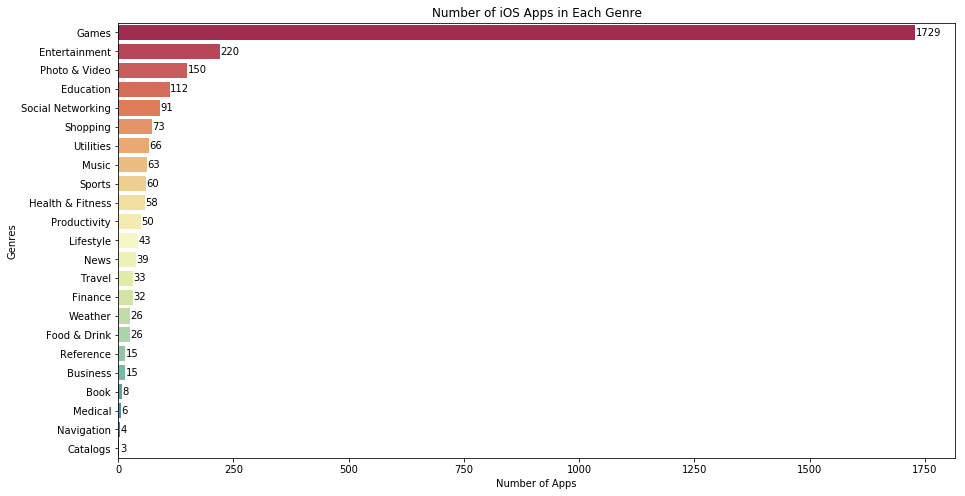

In [144]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'number', y = 'prime_genre', data = ios_genre, palette='Spectral')

plt.title('Number of iOS Apps in Each Genre')
plt.ylabel('Genres')
plt.xlabel('Number of Apps')

for x,y in enumerate(ios_genre['number']):
    plt.text(y+1, x, f'{y}', va='center')

In *android* dataset, an app can belong to multiple *genres* (apart from its main category). Therefore, *Category* of Android apps is the counterpart feature of *prime_genre* of iOS apps.

In [145]:
android_final[android_final['Genres'].str.contains(';')][:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2090,Minion Rush: Despicable Me Official Game,FAMILY,4.5,10216997,Varies with device,"100,000,000+",Free,0.0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,"100,000,000+",Free,0.0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
9680,Frozen Free Fall,FAMILY,4.3,1574546,37M,"50,000,000+",Free,0.0,Everyone,Puzzle;Action & Adventure,"July 27, 2018",6.7.0,4.2 and up
9144,Madden NFL Football,FAMILY,4.5,1455952,Varies with device,"10,000,000+",Free,0.0,Everyone,Sports;Action & Adventure,"May 15, 2018",4.3.6,4.0 and up
4229,Where's My Water? Free,FAMILY,4.4,1372013,57M,"100,000,000+",Free,0.0,Everyone,Puzzle;Brain Games,"November 21, 2017",1.10.0,4.1 and up
2119,Turbo FAST,FAMILY,4.3,1329192,97M,"50,000,000+",Free,0.0,Everyone,Racing;Action & Adventure,"October 4, 2017",2.1.20,2.3.3 and up
2127,Toca Kitchen 2,FAMILY,4.5,1014846,56M,"50,000,000+",Free,0.0,Everyone,Educational;Pretend Play,"June 29, 2017",1.2.3-play,4.1 and up
7589,Card Wars Kingdom,FAMILY,4.3,920571,28M,"10,000,000+",Free,0.0,Everyone 10+,Card;Action & Adventure,"January 17, 2017",1.0.10,4.0.3 and up
2134,Inside Out Thought Bubbles,FAMILY,4.4,623398,58M,"10,000,000+",Free,0.0,Everyone,Puzzle;Brain Games,"August 31, 2017",1.22.0,4.0.3 and up


In [146]:
android_genre = android_final.groupby('Category').size().to_frame()
android_genre.reset_index(inplace = True)
android_genre['number'] = android_genre[0]
del android_genre[0]
android_genre.sort_values('number', ascending = False, inplace = True)
#len(android_genre)

android_genre

,Category,number
12,FAMILY,1401
15,GAME,770
30,TOOLS,634
13,FINANCE,275
26,PRODUCTIVITY,271
19,LIFESTYLE,263
5,BUSINESS,243
25,PHOTOGRAPHY,240
16,HEALTH_AND_FITNESS,226
29,SPORTS,225


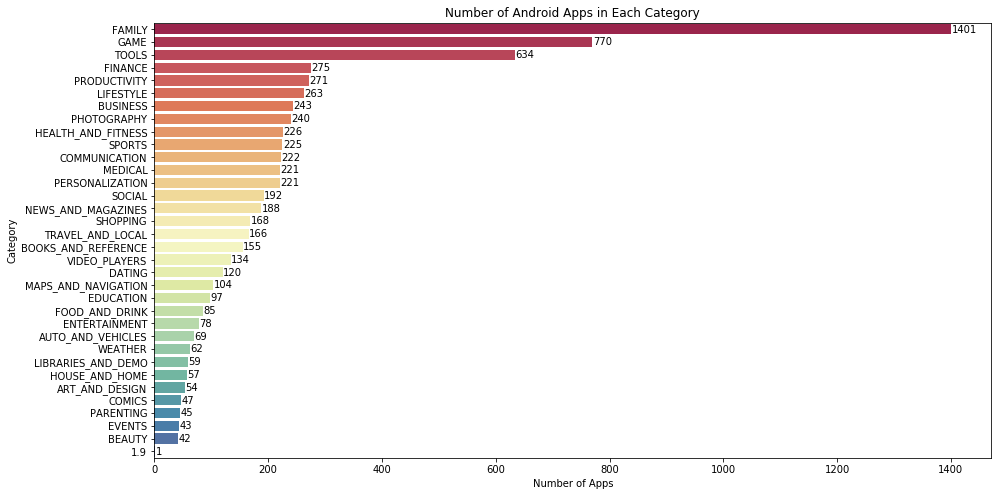

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'number', y = 'Category', data = android_genre, palette='Spectral')

plt.title('Number of Android Apps in Each Category')
plt.ylabel('Category')
plt.xlabel('Number of Apps')

for x,y in enumerate(android_genre['number']):
    plt.text(y+1, x, f'{y}', va='center')

### 2.2 Genres with the Highest Average Reviews

*Weather* and *Shopping* are two common genres in the Top 10 with highest average reviews in both the App Store and Google Play.

Here are the detailed lists and bar charts.

In [148]:
ios_grv = ios_target.groupby('prime_genre')['rating_count_tot'].mean().to_frame()
ios_grv.reset_index(inplace = True)
ios_grv.sort_values('rating_count_tot', ascending = False, inplace = True)
ios_grv['rating_count_tot'] = ios_grv['rating_count_tot'].astype(int)
ios_grv.reset_index(drop = True, inplace = True)
ios_grv

,prime_genre,rating_count_tot
0,Navigation,125037
1,Reference,89562
2,Social Networking,78567
3,Music,55396
4,Weather,48275
5,Travel,34115
6,Food & Drink,33333
7,Photo & Video,29249
8,Shopping,28877
9,Finance,26038


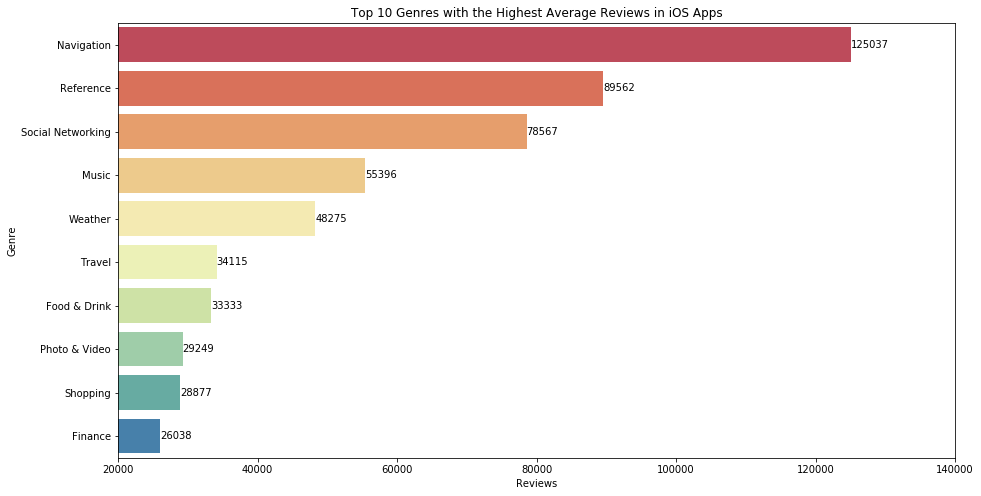

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'rating_count_tot', y = 'prime_genre', data = ios_grv[:10], palette='Spectral')

plt.title('Top 10 Genres with the Highest Average Reviews in iOS Apps')
plt.ylabel('Genre')
plt.xlabel('Reviews')
plt.xlim(20000, 140000)

for x,y in enumerate(ios_grv['rating_count_tot'][:10]):
    plt.text(y+0.01, x, f'{y}', va='center')

In [150]:
android_grv = android_final.groupby('Category')['Reviews'].mean().to_frame()
android_grv.reset_index(inplace = True)
android_grv.sort_values('Reviews', ascending = False, inplace = True)
android_grv['Reviews'] = android_grv['Reviews'].astype(int)
android_grv.reset_index(drop = True, inplace = True)
android_grv

,Category,Reviews
0,SOCIAL,1185853
1,COMMUNICATION,985983
2,GAME,707479
3,VIDEO_PLAYERS,459698
4,PHOTOGRAPHY,431564
5,TOOLS,355381
6,ENTERTAINMENT,325207
7,SHOPPING,263763
8,PERSONALIZATION,208116
9,WEATHER,194961


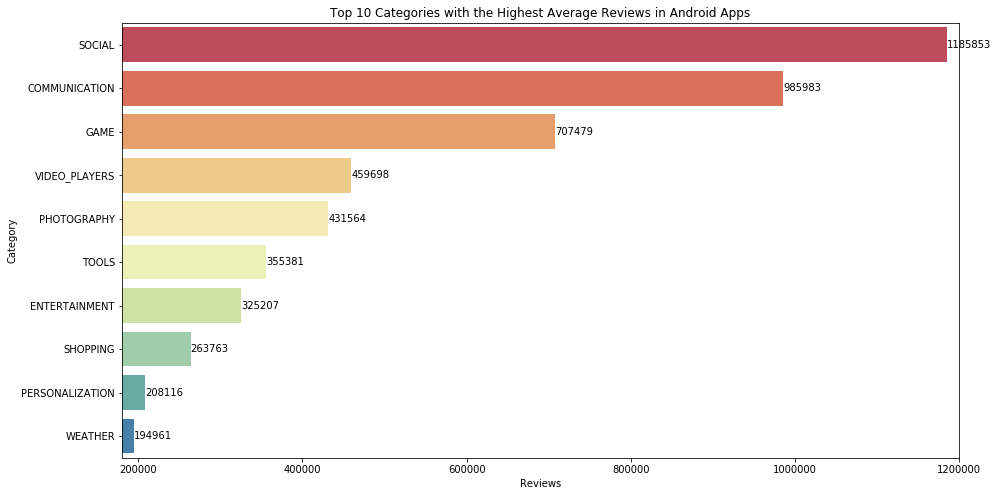

In [151]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Reviews', y = 'Category', data = android_grv[:10], palette='Spectral')

plt.title('Top 10 Categories with the Highest Average Reviews in Android Apps')
plt.ylabel('Category')
plt.xlabel('Reviews')
plt.xlim(180000, 1200000)

for x,y in enumerate(android_grv['Reviews'][:10]):
    plt.text(y+0.01, x, f'{y}', va='center')

### 2.3 Genres with the Highest Average Ratings

*Game*, *Health & Fitness*, and *Reference* are three common genres in the Top 10 with highest average ratings in both the App Store and Google Play.

Here are the detailed lists and bar charts.

In [152]:
ios_gr = ios_target.groupby('prime_genre')['user_rating'].mean().to_frame()
ios_gr.reset_index(inplace = True)
ios_gr.sort_values('user_rating', ascending = False, inplace = True)
ios_gr['user_rating'] = ios_gr['user_rating'].round(2)
ios_gr.reset_index(drop = True, inplace = True)
ios_gr

,prime_genre,user_rating
0,Catalogs,4.17
1,Productivity,4.05
2,Games,4.05
3,Shopping,3.96
4,Music,3.94
5,Health & Fitness,3.88
6,Navigation,3.88
7,Business,3.87
8,Photo & Video,3.87
9,Reference,3.83


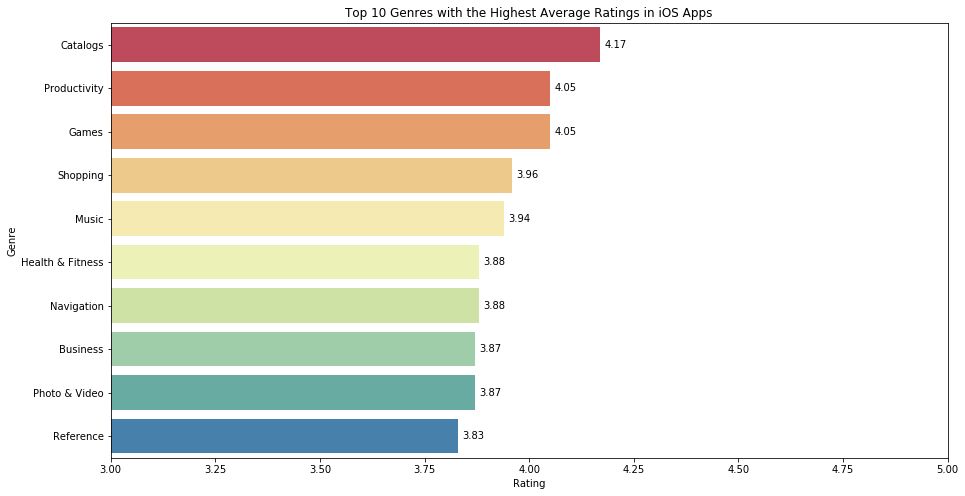

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'user_rating', y = 'prime_genre', data = ios_gr[:10], palette='Spectral')

plt.title('Top 10 Genres with the Highest Average Ratings in iOS Apps')
plt.ylabel('Genre')
plt.xlabel('Rating')
plt.xlim(3, 5)

for x,y in enumerate(ios_gr['user_rating'][:10]):
    plt.text(y+0.01, x, f'{y}', va='center')

In [154]:
android_gr = android_final.groupby('Category')['Rating'].mean().to_frame()
android_gr.reset_index(inplace = True)
android_gr.sort_values('Rating', ascending = False, inplace = True)
android_gr['Rating'] = android_gr['Rating'].round(2)
android_gr.reset_index(drop = True, inplace = True)
android_gr

,Category,Rating
0,1.9,19.00
1,EVENTS,4.43
2,PARENTING,4.37
3,BOOKS_AND_REFERENCE,4.34
4,EDUCATION,4.34
5,ART_AND_DESIGN,4.33
6,PERSONALIZATION,4.30
7,BEAUTY,4.28
8,SOCIAL,4.25
9,HEALTH_AND_FITNESS,4.23


In [159]:
android_final[android_final['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,1042,"1,000+",Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


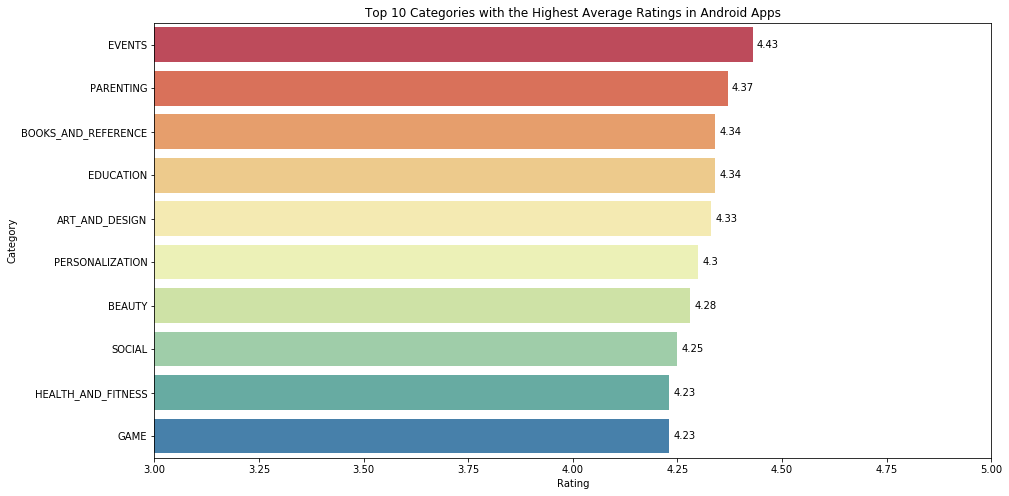

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Rating', y = 'Category', data = android_gr[1:11], palette='Spectral')

plt.title('Top 10 Categories with the Highest Average Ratings in Android Apps')
plt.ylabel('Category')
plt.xlabel('Rating')
plt.xlim(3, 5)

for x,y in enumerate(android_gr['Rating'][1:11]):
    plt.text(y+0.01, x, f'{y}', va='center')

### 2.4 Content Rating (Android)

In [168]:
android_final['Content Rating'].unique()

array(['Teen', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

Text(0.5, 1.0, 'Box Plot - Rating VS Content')

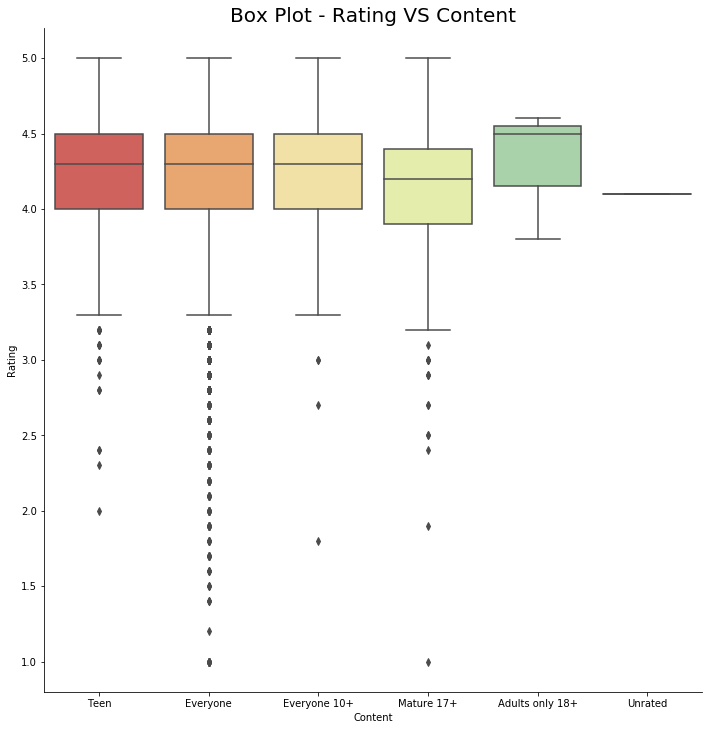

In [170]:
sns.catplot(x = 'Content Rating', y = 'Rating', data = android_final, kind = 'box', height = 10, palette='Spectral')
plt.xlabel('Content')
plt.ylabel('Rating')
plt.title('Box Plot - Rating VS Content',size = 20)